In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [284]:
data_frame = pd.read_csv("./train.csv")
data_frame.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [285]:
data_frame.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [286]:
data_frame.shape

(1460, 81)

In [287]:
data_frame.isna().sum()[data_frame.isna().sum() > 0]/data_frame.shape[0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

**We are going to delete evry column which have more then 80% NaN values**

In [288]:
data_frame.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace = True)

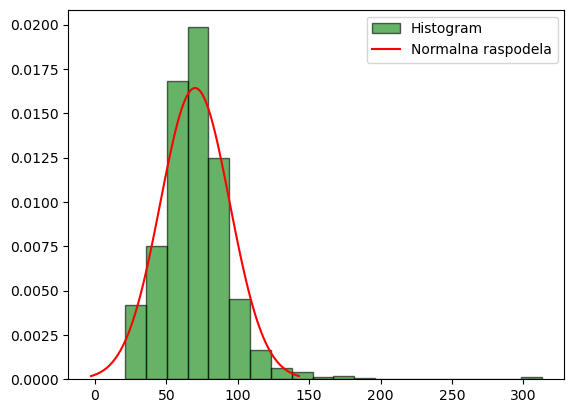

In [289]:
# Crtanje histograma
plt.hist(data_frame["LotFrontage"], bins=20, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')

# Izračunavanje srednje vrednosti i standardne devijacije
mean = data_frame["LotFrontage"].mean()
std_dev = data_frame["LotFrontage"].std()

# Kreiranje niza vrednosti za x osu
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)

# Računanje vrednosti funkcije normalne raspodele za svaku vrednost x
y = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Crtanje funkcije normalne raspodele
plt.plot(x, y, color='r', label='Normalna raspodela')

# Dodavanje legendi
plt.legend()

# Prikazivanje grafikona
plt.show()

In [290]:
mean = data_frame["LotFrontage"].mean()
std_dev = data_frame["LotFrontage"].std()

# Definišite granicu za outlayere
threshold = 3 * std_dev

# Postavite outlayere veće od 3 standardne devijacije na granicu od 3 standardne devijacije
data_frame["LotFrontage"] = np.where(data_frame["LotFrontage"] > mean + threshold, mean + threshold, data_frame["LotFrontage"])

In [291]:
data_frame["LotFrontage"].fillna(mean, inplace=True)

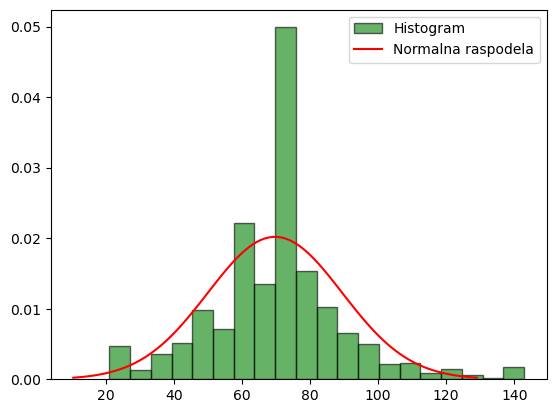

In [292]:
# Crtanje histograma
plt.hist(data_frame["LotFrontage"], bins=20, density=True, alpha=0.6, color='g', edgecolor='black', label='Histogram')

# Izračunavanje srednje vrednosti i standardne devijacije
mean = data_frame["LotFrontage"].mean()
std_dev = data_frame["LotFrontage"].std()

# Kreiranje niza vrednosti za x osu
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)

# Računanje vrednosti funkcije normalne raspodele za svaku vrednost x
y = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

# Crtanje funkcije normalne raspodele
plt.plot(x, y, color='r', label='Normalna raspodela')

# Dodavanje legendi
plt.legend()

# Prikazivanje grafikona
plt.show()

<Axes: >

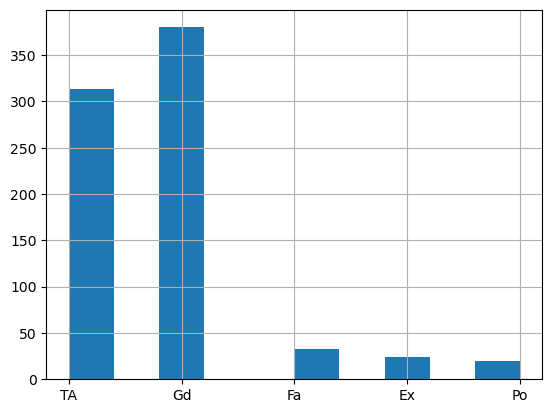

In [293]:
data_frame["FireplaceQu"].hist()

In [294]:
null_vrednosti = data_frame["FireplaceQu"].isna().sum()

# Generišite random indekse za 50% null vrednosti
random_indeksi = np.random.choice(data_frame.index, null_vrednosti // 2, replace=False)

# Popunite null vrednosti na random indeksima sa "TA"
data_frame.loc[random_indeksi, "FireplaceQu"] = "TA"

# Popunite preostale null vrednosti sa "Gd"
data_frame["FireplaceQu"].fillna("Gd", inplace=True)

<Axes: >

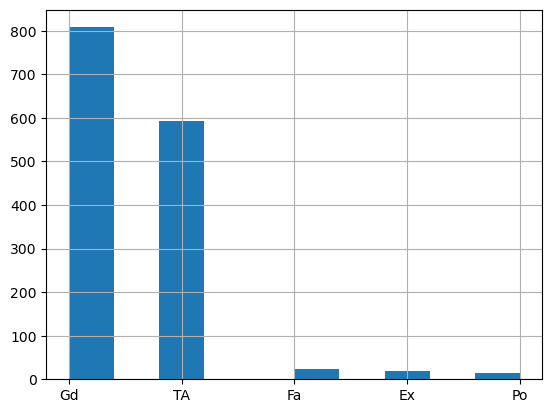

In [295]:
data_frame["FireplaceQu"].hist()

<Axes: >

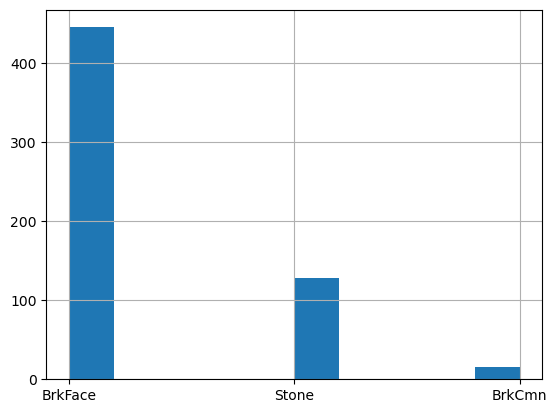

In [296]:
data_frame["MasVnrType"].hist()

In [297]:
raspodela_vrednosti = data_frame["MasVnrType"].value_counts(normalize=True)

# Generišite random vrednosti u skladu sa raspodelom postojećih vrednosti
nedostajuce_vrednosti = np.random.choice(raspodela_vrednosti.index, size=data_frame["MasVnrType"].isna().sum(), p=raspodela_vrednosti)

# Popunite nedostajuće vrednosti sa generisanim random vrednostima
data_frame.loc[data_frame["MasVnrType"].isna(), "MasVnrType"] = nedostajuce_vrednosti

<Axes: >

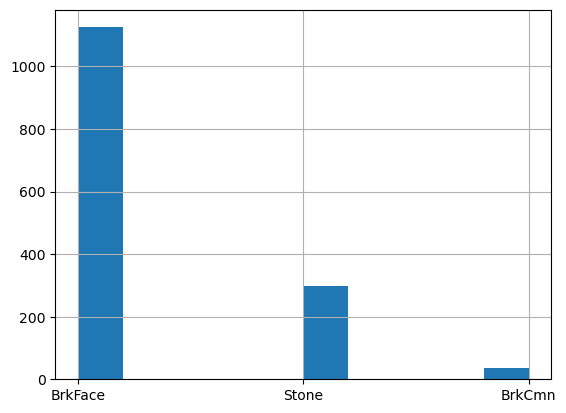

In [298]:
data_frame["MasVnrType"].hist()

In [299]:
for column in data_frame.columns[data_frame.isna().any()]:
    # Generišite random indekse
    random_indeksi = np.random.choice(data_frame[column].dropna().index, size=data_frame[column].isna().sum(), replace=True)
    
    # Popunite nedostajuće vrednosti sa random vrednostima
    data_frame.loc[data_frame[column].isna(), column] = data_frame.loc[random_indeksi, column].values

In [300]:
data_frame.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [301]:
data_frame[data_frame["PoolArea"] > 2 ]["PoolArea"]

197     512
810     648
1170    576
1182    555
1298    480
1386    519
1423    738
Name: PoolArea, dtype: int64

In [302]:
from sklearn.preprocessing import OrdinalEncoder

# Kreirajte OrdinalEncoder objekat
ordinal_encoder = OrdinalEncoder()

# Napravite kopiju DataFrame-a kako biste izbegli menjanje originalnog DataFrame-a
data_frame_copy = data_frame.copy()

# Iterirajte kroz sve kolone
for column in data_frame_copy.columns:
    # Proverite da li je tip podataka string
    if data_frame_copy[column].dtype == 'object':
        # Transformišite vrednosti u numeričke vrednosti
        data_frame_copy[column] = ordinal_encoder.fit_transform(data_frame_copy[[column]])

# Ažurirajte originalni DataFrame sa transformiranim vrednostima
data_frame.update(data_frame_copy)

In [303]:
data_frame.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.695746,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.265753,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,19.759344,9981.264932,1.382997,1.112799,30.202904,20.645407,180.685282,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,142.904214,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [304]:
from sklearn.model_selection import train_test_split

In [305]:
Y = data_frame["SalePrice"]
X = data_frame.drop(["SalePrice", "Id"], axis=1)

In [306]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [307]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [325]:
def train(X_train, Y_train):
    parametri = {
        'n_estimators': [10, 50, 100],  # Broj stabala u random forest-u
        'max_depth': [None, 10, 20],      # Maksimalna dubina stabala
        'min_samples_split': [2, 5, 10]   # Minimalni broj uzoraka za podelu čvora
    }

    # Inicijalizujemo RandomForestRegressor
    model = RandomForestRegressor()

    # Inicijalizujemo GridSearchCV sa RandomForestRegressor i parametrima
    grid_search = GridSearchCV(estimator=model, param_grid=parametri, cv=5, scoring='neg_mean_squared_error')

    # Treniramo GridSearchCV model na trening podacima
    grid_search.fit(X_train, Y_train)

    # Dobijamo najbolje parametre
    print("Najbolji parametri:", grid_search.best_params_)

    # Dobijamo najbolji model
    best_model = grid_search.best_estimator_

    # Predviđamo na test podacima
    predict = best_model.predict(X_test)

    return best_model

NameError: name 'best_model' is not defined

In [326]:
final_model = train(X, Y)

Najbolji parametri: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


In [327]:
test_set = pd.read_csv("./test.csv")

In [328]:
se1 = pd.read_csv("./sample_submission.csv")

In [329]:
se1

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [330]:
test_set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [331]:
def fitTest(data_frame):
    data_frame.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace = True)
    data_frame["LotFrontage"].fillna(mean, inplace=True)
    # Kreirajte OrdinalEncoder objekat
    ordinal_encoder = OrdinalEncoder()

    # Napravite kopiju DataFrame-a kako biste izbegli menjanje originalnog DataFrame-a
    data_frame_copy = data_frame.copy()

    # Iterirajte kroz sve kolone
    for column in data_frame_copy.columns:
        # Proverite da li je tip podataka string
        if data_frame_copy[column].dtype == 'object':
            # Transformišite vrednosti u numeričke vrednosti
            data_frame_copy[column] = ordinal_encoder.fit_transform(data_frame_copy[[column]])

    # Ažurirajte originalni DataFrame sa transformiranim vrednostima
    data_frame.update(data_frame_copy)
    return data_frame

In [332]:
test_set = fitTest(test_set)

In [333]:
def fillNaData(data_frame):
    for column in data_frame.columns[data_frame.isna().any()]:
        # Generišite random indekse
        random_indeksi = np.random.choice(data_frame[column].dropna().index, size=data_frame[column].isna().sum(), replace=True)

        # Popunite nedostajuće vrednosti sa random vrednostima
        data_frame.loc[data_frame[column].isna(), column] = data_frame.loc[random_indeksi, column].values
    return data_frame

In [334]:
test_set = fillNaData(test_set)

In [335]:
id1 = test_set["Id"]
test_set.drop("Id", axis = 1, inplace = True)

In [336]:
id1.shape

(1459,)

In [337]:
pre = final_model.predict(test_set)

In [338]:
pre.shape

(1459,)

In [339]:
answer2 = pd.DataFrame({'Id': id1, 'SalePrice': pre}).set_index('Id')
answer2.to_csv("answer2.csv")
answer2

,SalePrice
Id,
1461,126169.823438
1462,155005.940476
1463,180588.761984
1464,182536.396227
1465,196980.784008
...,...
2915,85240.677930
2916,84463.957799
2917,151246.779036


In [340]:
answer2.to_csv("answer2.csv")

In [341]:
id1 = pd.DataFrame(id1)

In [342]:
id1['SalePrice'] = pre

In [343]:
real_set = pd.read_csv("./sample_submission.csv")

In [344]:
real_set

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659
